In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [26]:
# Sample exchange rate (1 USD to GBP)
exchange_rate = 0.73  # Replace with the current exchange rate

In [27]:
# filter for the job titles and country
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [28]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

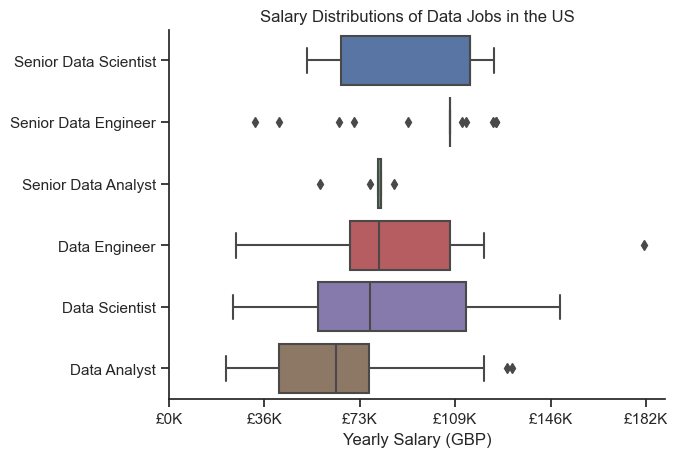

In [29]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (GBP)')
plt.ylabel('')
plt.xlim(0, 260000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'£{int((y*exchange_rate)/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [16]:
# Only get data analyst jobs in the US
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK = df_DA_UK.explode('job_skills')

df_DA_UK[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [30]:
df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [33]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


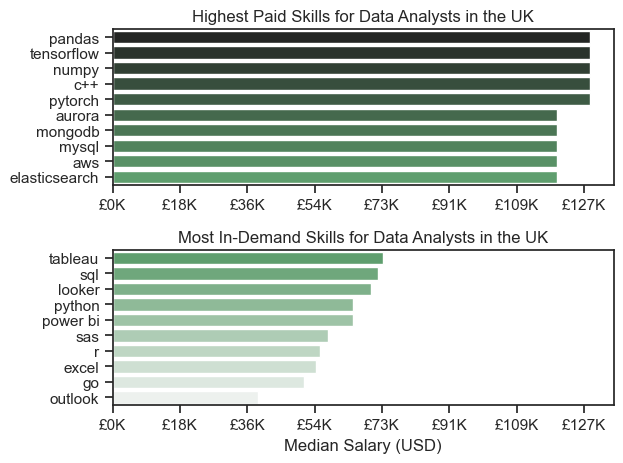

In [34]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette='dark:g')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int((x*exchange_rate)/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:g_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int((x*exchange_rate)/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()